In [1]:
import os
from bokeh.models import ColumnDataSource,Legend
from bokeh.io import output_notebook, show
from bokeh.palettes import Category10
from bokeh.plotting import figure, show
from bokeh.io import output_file
import numpy as np
from ipyleaflet import Map, GeoJSON, Marker, AwesomeIcon, FullScreenControl
import requests
import json
import random
import plotly.graph_objs as go
import plotly.offline as pyo
from datetime import datetime
import seaborn as sns
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
import calplot
import mpld3
import folium


In [2]:
##
#
# Author: 
# Salim Omar
#
##

# cleaning and preprocessing

csv_path = "../../Fire_Incidents.csv"

if not os.path.exists(csv_path):
    # Download CSV from API if it doesn't exist locally
    url = "https://data.sfgov.org/resource/wr8u-xric.json"
    response = requests.get(url)
    df = pd.read_json(response.text)
    df.to_csv(csv_path, index=False , low_memory=False)
    print("The data has been readed from ", url)
else:
    # Load CSV from local file
    df = pd.read_csv(csv_path, low_memory=False)
    print("The data is found locally")

#df.head()


    # cleaning and preprocessing


# Load CSV from local file
df = pd.read_csv(csv_path)
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])
df['Arrival DtTm'] = pd.to_datetime(df['Arrival DtTm'])
df['Close DtTm'] = pd.to_datetime(df['Close DtTm'])

df['Incident Time'] = df['Incident Date'].dt.time
df['Incident month'] = df['Incident Date'].dt.month
df['Incident year'] = df['Incident Date'].dt.year


# Get the data from date 2010-04-01 to 2023-04-01
df = df[(df['Incident year'] >= 2010) &
        (df['Incident year'] <= 2022)]


# print the number of rows
num_rows = df.shape[0]
print("The number of rows is:", num_rows)

# get just the data from Sf city
df = df[(df['City'] == 'SF') | (df['City'] == 'San Francisco')
        | (df['City'] == 'SAN FRANCISCO')]

# Deleting all unnaseccary columns
df.drop(columns=['Exposure Number',
                'Box',
                'Fire Fatalities',
                'Fire Injuries',
                'Civilian Fatalities',
                'Civilian Injuries',
                'Number of Alarms',
                'Mutual Aid',
                'Action Taken Secondary',
                'Action Taken Other',
                'Area of Fire Origin',
                'Ignition Cause',
                'Ignition Factor Primary',
                'Ignition Factor Secondary',
                'Item First Ignited',
                'Human Factors Associated with Ignition',
                'Structure Type',
                'Structure Status',
                'Floor of Fire Origin',
                'Fire Spread',
                'No Flame Spead',
                'Number of floors with minimum damage',
                'Number of floors with significant damage',
                'Number of floors with heavy damage',
                'Number of floors with extreme damage',
                'Detectors Present',
                'Detector Type',
                'Detector Operation',
                'Detector Effectiveness',
                'Detector Failure Reason',
                'Automatic Extinguishing System Present',
                'Automatic Extinguishing Sytem Type',
                'Automatic Extinguishing Sytem Perfomance',
                'Automatic Extinguishing Sytem Failure Reason',
                'Number of Sprinkler Heads Operating'
                ], inplace=True)
# the code for Primary Situation
df['focuse_Situation_by_number'] = df['Primary Situation'].str[:3]

# error rows
df.drop(df[df['ID'] == 140383810 ].index, axis=0, inplace=True)
df.drop(df[df['ID'] == 140660390 ].index, axis=0, inplace=True)

print("Example on dataset:")
df.head()




The data is found locally


C:\Users\salim\AppData\Local\Temp\ipykernel_29212\149088013.py:31: DtypeWarning:

Columns (10,12,13,20,38,45,46,55,59) have mixed types. Specify dtype option on import or set low_memory=False.



The number of rows is: 408335
Example on dataset:


,Incident Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,zipcode,...,Detector Alerted Occupants,Property Use,Heat Source,Supervisor District,neighborhood_district,point,Incident Time,Incident month,Incident year,focuse_Situation_by_number
205932,10001468,100014680,274 Brannan St.,2010-01-05,100050086,2010-01-05 08:26:41,2010-01-05 08:32:04,2010-01-05 08:41:49,SF,94107,...,-,429 - Multifamily dwellings,NaN,NaN,Financial District/South Beach,POINT (-122.39169312 37.78233494),00:00:00,1,2010,745
205933,10001472,100014720,Brotherhood Wy. / Thomas More Wy.,2010-01-05,100050091,2010-01-05 08:52:51,2010-01-05 08:57:14,2010-01-05 08:57:36,SF,94112,...,-,"960 - Street, other",NaN,7.0,Lakeshore,POINT (-122.472734 37.712926),00:00:00,1,2010,711
205934,10001473,100014730,684 48th Av.,2010-01-05,100050092,2010-01-05 08:54:09,2010-01-05 09:23:33,2010-01-05 09:23:48,SF,94121,...,-,429 - Multifamily dwellings,NaN,NaN,Outer Richmond,POINT (-122.509025 37.775448),00:00:00,1,2010,353
205935,10001476,100014760,690 Market St.,2010-01-05,100050098,2010-01-05 09:07:38,2010-01-05 09:11:47,2010-01-05 09:20:48,SF,94105,...,-,599 - Business office,NaN,NaN,Financial District/South Beach,POINT (-122.403309 37.787838),00:00:00,1,2010,740
205936,10001477,100014770,1300 Junipero Serra Bl.,2010-01-05,100050099,2010-01-05 09:10:42,2010-01-05 09:15:48,2010-01-05 09:21:06,SF,94112,...,-,429 - Multifamily dwellings,NaN,7.0,Lakeshore,POINT (-122.472036 37.711842),00:00:00,1,2010,700


# Part 1

## 1. Top 10 Primary Situation

In [25]:
##
#
# Author: 
# Salim Omar
#
##
# create a new dataset for top 10 Primary Situation
top10_df = df[['Primary Situation', 'focuse_Situation_by_number','neighborhood_district','Incident year']].copy()

# replace 2 coulms in 1 
top10_df['Primary Situation'].replace(['745 Alarm system sounded/no fire-accidental',
                                '735 Alarm system sounded due to malfunction'], '745 Alarm system activation', inplace=True)
top10_df = top10_df[top10_df['Primary Situation'] != '554 Assist invalid']

# add Situation_by_code
top10_df['focuse_Situation_by_number'] = top10_df['Primary Situation'].str[:3]
top10_df.head(100)


,Primary Situation,focuse_Situation_by_number,neighborhood_district,Incident year
205932,745 - Alarm system sounded/no fire-accidental,745,Financial District/South Beach,2010
205933,"711 - Municipal alarm system, Street Box False",711,Lakeshore,2010
205934,353 - Removal of victim(s) from stalled elev.,353,Outer Richmond,2010
205935,"740 - Unintentional alarm, other",740,Financial District/South Beach,2010
205936,"700 - False alarm or false call, other",700,Lakeshore,2010
...,...,...,...,...
206612,412 - Gas leak (natural gas or LPG),412,Sunset/Parkside,2010
206629,531 - Smoke or odor removal,531,Bayview Hunters Point,2010
206634,442 - Overheated motor,442,South of Market,2010
206635,735 - Alarm system sounded due to malfunction,735,Russian Hill,2010


In [26]:
##
#
# Author: 
# Salim Omar
#
##

# Becouse some of Primary Situation have '-' but it's have the same value and code so I delete 
top10_df['Primary Situation'] = top10_df['Primary Situation'].str.replace('- ', '')
top10_df.dropna(subset=['Primary Situation'], inplace=True)
top10_df['Primary Situation'] = top10_df['Primary Situation'].dropna().apply(
    lambda x: x.split(',')[0])

# print(call_Situation)
call_Situation = top10_df['Primary Situation']
len(call_Situation)
# by using unique() fun we can se the diffrenet type of data

ListOfSituation = call_Situation.unique()
#print(ListOfSituation)

Situation_count = call_Situation.value_counts()

# Get the top 10 most frequent situations
top10 = Situation_count.nlargest(10)
print("The top 1o list\n",top10)



The top 1o list
 700 False alarm or false call                   40915
711 Municipal alarm system                      36134
745 Alarm system activation                     28391
500 Service Call                                15973
113 Cooking fire                                12222
743 Smoke detector activation                   12162
322 Motor vehicle accident with injuries        11519
151 Outside rubbish                             10496
311 Medical assist                               9519
324 Motor vehicle accident with no injuries.     7790
Name: Primary Situation, dtype: int64


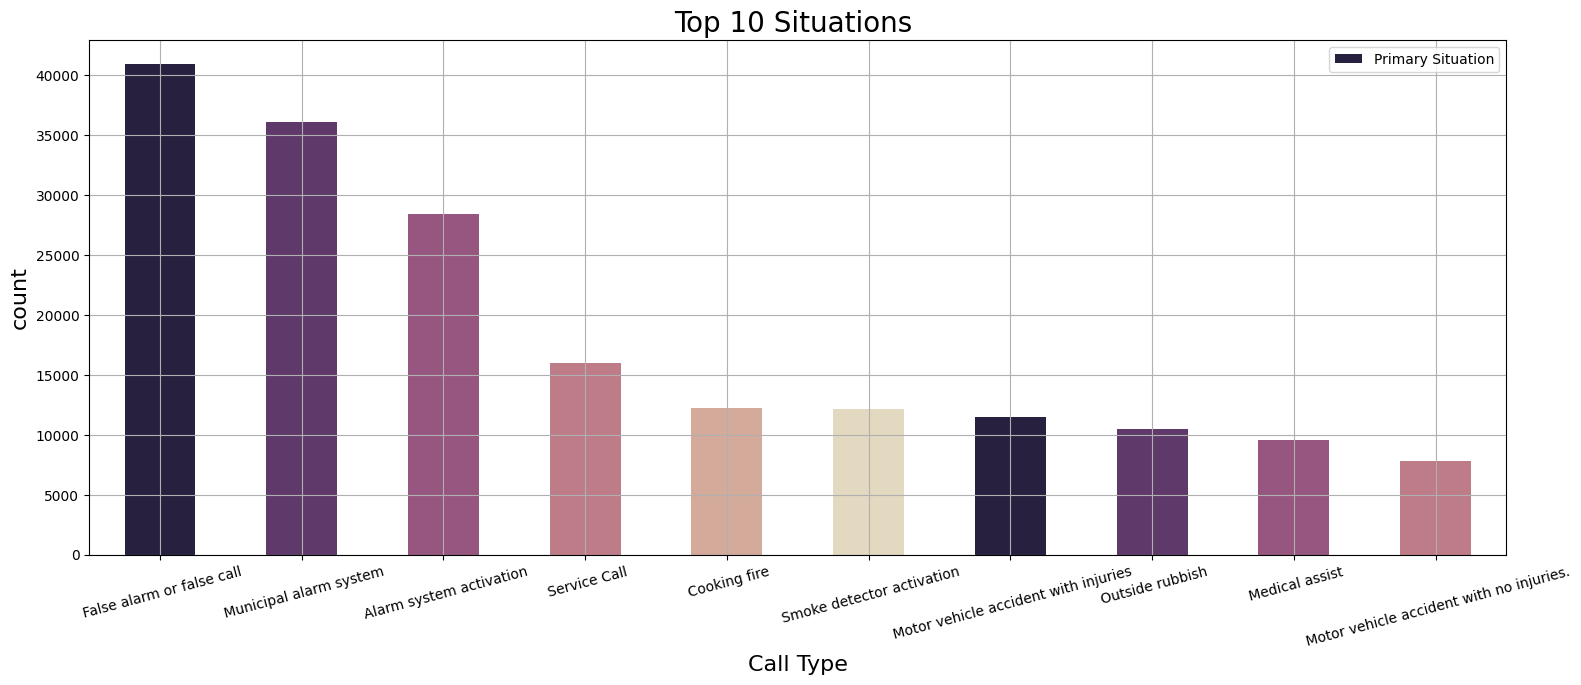

In [27]:
##
#
# Author: 
# Salim Omar
#
##

fig, ax = plt.subplots(figsize=(16, 7))

# define a color map
cmap = sns.color_palette("ch:s=-.2,r=.6")[::-1]

# plot the top 10 situations with the colormap
top10.plot(kind='bar', color=cmap, ax=ax)

# set the chart title and axis labels
plt.title('Top 10 Situations ', fontsize=20)
plt.xlabel('Call Type', fontsize=16)
plt.ylabel('count', fontsize=16)

# add grid lines
ax.grid(True)

# adjust x-tick labels rotation and font size
plt.xticks(rotation=15, fontsize=10)
new_xticklabels = [label.get_text()[3:] for label in ax.get_xticklabels()]
ax.set_xticklabels(new_xticklabels)

# add legend
ax.legend(loc='upper right')


# adjust spacing
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)

# convert to HTML and save
html = mpld3.fig_to_html(fig)
with open('Top_10_plot.html', 'w') as f:
    f.write(html)

# display the chart
plt.show()


## 2. Bokeh plot for top 10 Primary Situation and neighborhood_district

In [28]:
##
#
# Author: 
# Salim Omar
#
##

##
#
#This Bokeh plot shows the count of the top 10 
# Primary Situations in different neighborhood districts.
# The x-axis represents the neighborhood districts,
# and the y-axis represents the count of calls related to each of the top 10 Primary Situations.
# Each bar in the chart represents a specific Primary Situation,
# and the height of the bar represents the count of calls related to that situation in the specific neighborhood district.
# The bars are color-coded based on the Primary Situation they represent, 
# and they can be muted by clicking on the legend on the right-hand side of the chart.
#
##

# get a list of the top 10
top10_situations = top10.index.tolist()
#print(top10_situations)
#print(df['Primary Situation'])
top10_df = top10_df[top10_df['Incident year'] == 2022]
top10_df  = top10_df[top10_df['Primary Situation'].isin(top10_situations)]
print(df['Primary Situation'])
neighborhood_Primary_Situation = top10_df.groupby(['Primary Situation','neighborhood_district']).size().reset_index(name='count')
#print(Battalion_Primary_Situation)

neighborhood_Primary_Situation.to_csv("neighborhood_Primary_Situation.csv")
# calculate the total count for each neighborhood
neighborhood_Primary_counts = top10_df.groupby(['Primary Situation']).size().reset_index(name='total_count')
#print(neighborhood_Primary_counts)

# merge the two dataframes to get the total count for each row
neighborhood_Primary_Situation = pd.merge(neighborhood_Primary_Situation, neighborhood_Primary_counts, on='Primary Situation')
#print(neighborhood_Primary_Situation)


#calculate the count pr ituation pr neighborhood
neighborhood_Primary_Situation['count_pr_Situation_pr_neighborhood'] = neighborhood_Primary_Situation['count'] 


columns = ['Primary Situation', 'neighborhood_district', 'count_pr_Situation_pr_neighborhood']
focusData =  pd.DataFrame(neighborhood_Primary_Situation, columns=columns)
#print(focusData)

# Pivot the dataframe
pivoted_focusData = focusData.pivot_table(index='neighborhood_district', columns='Primary Situation', values='count_pr_Situation_pr_neighborhood')

# Display the pivoted dataframe
#print(pivoted_focusData)


source = ColumnDataSource(data=pivoted_focusData)
## it is a standard way to convert your df to bokeh
output_notebook()


# Define a figure with title and axis labels
p = figure(x_range=source.data['neighborhood_district'], title="counts for call Situation pr neighborhood in 2022",x_axis_label='neighborhood')
colo = Category10[10]
p.xaxis.major_label_orientation = 1.2
#3. Now we are going to add the bars. In order to do so, we will use vbar (see the guide for help):
bar ={} # to store vbars
items=[]


### here we will do a for loop:
for indx,Situation  in enumerate(pivoted_focusData.columns):
    bar[Situation] =p.vbar(x='neighborhood_district', 
    top=Situation ,
    source=source,
    muted=True, 
    muted_alpha=0.05,
    fill_alpha=1.9,
    color=colo[indx],
    width=0.7)
    items.append((Situation, [bar[Situation]]))

205932        745 - Alarm system sounded/no fire-accidental
205933       711 - Municipal alarm system, Street Box False
205934        353 - Removal of victim(s) from stalled elev.
205935                     740 - Unintentional alarm, other
205936               700 - False alarm or false call, other
                                ...                        
617640          735 Alarm system sounded due to malfunction
617641                 550 Public service assistance, other
617642    745 Alarm system activation, no fire - uninten...
617643                 700 False alarm or false call, other
618034                            531 Smoke or odor removal
Name: Primary Situation, Length: 397633, dtype: object


Loading BokehJS ...

In [29]:
##
#
# Author: 
# Salim Omar
#
##
# The last thing to do is to make legend interactive and display the figure:
legend = Legend(items=items)
p.add_layout(legend, 'left')
p.legend.click_policy = "mute"
output_file('bokeh_Situation_pr_neighborhood.html')
show(p)


## 3. Map to show the distribution for 4 Primary Situations in different Neighborhood

In [3]:
##
#
# Author: 
# Salim Omar
#
##

# dataset for map
df_2022 = df[(df['Incident Date'] >= '2022-12-01') &
            (df['Incident Date'] <= '2022-12-31')]
df_2022.head()
# len(df_2022)
focuse_Situation2 = df_2022['Primary Situation']
ListOfSituation2 = focuse_Situation2.unique()
#print(ListOfSituation2)
len(ListOfSituation2)

focuse_Situation = df_2022['focuse_Situation_by_number']
ListOfSituation = focuse_Situation.unique()
#print(ListOfSituation)
from shapely import wkt
# df_2022.loc[df_2022['focuse_Situation_by_number'].str.startswith('1'), 'focuse_Situation_by_number'] = 'Fire/explosion'
# df_2022.loc[df_2022['focuse_Situation_by_number'].str.startswith('5'), 'focuse_Situation_by_number'] = 'Public service'
# df_2022.loc[df_2022['focuse_Situation_by_number'].str.startswith('7'), 'focuse_Situation_by_number'] = 'Alarm'
# df_2022['focuse_Situation_by_number'].replace(['322','324'], 'Motor vehicle accident', inplace=True)
# df_2022['focuse_Situation_by_number'].replace(['311'], 'Medical assist', inplace=True)
# df_2022['focuse_Situation_by_number'].replace(['700'], 'False alarm/call', inplace=True)
# df_2022['focuse_Situation_by_number'].replace(['322'], 'Motor vehicle accident with injuries', inplace=True)
# df_2022['focuse_Situation_by_number'].replace(['311'], 'Medical assist', inplace=True)
df_2022 = df_2022[df_2022['focuse_Situation_by_number'].isin(['111', '700', '113','150'])]
df_2022['focuse_Situation_by_number'].replace(['150'], 'Outside rubbish fire', inplace=True)
df_2022['focuse_Situation_by_number'].replace(['111'], 'Building fire', inplace=True)
df_2022['focuse_Situation_by_number'].replace(['700'], 'False alarm/call', inplace=True)
df_2022['focuse_Situation_by_number'].replace(['113'], 'Cooking fire', inplace=True)

# keep the important coulmn and drop other 
df_2022 = df_2022.loc[:, ['ID', 'point', 'Incident year', 'focuse_Situation_by_number']]


df_2022['point'] = df_2022['point'].apply(wkt.loads)
df_2022['lon'] = df_2022['point'].apply(lambda p: p.x)
df_2022['lat'] = df_2022['point'].apply(lambda p: p.y)

focuse_Situation = df_2022['focuse_Situation_by_number']
ListOfSituation = focuse_Situation.unique()
print(ListOfSituation)

df_2022.head()
len(df_2022)


['Cooking fire' 'Outside rubbish fire' 'False alarm/call' 'Building fire']


560

In [8]:
##
#
# Author: 
# Salim Omar
#
##

with open('../geo_map_data/Planning Neighborhood Groups Map.geojson', 'r') as f:
    data = json.load(f)

data["features"][0]


# Create a dictionary to map focuse_Situation_by_number values to colors
situation_color_dict = {
    # 'Fire/explosion': 'green',
    'Outside rubbish fire': 'orange',
    'False alarm/call': 'purple',
    'Cooking fire': 'blue',
    'Building fire': 'red'
}

color_icon_dict = {
    'red': 'fa-fire',
    # 'green': 'fa-aulance',
    'blue': 'fa-building',
    'orange': 'fa-free-code-camp',
    'purple': 'fa-bell'
}


def random_color(fea):
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }


my_map = Map(center=(37.7749, -122.4194), zoom=12,
    layout={'height': '600px', 'width': '100%'})


# Add GeoJSON layer to the map
geojson_layer = GeoJSON(
    data=data,
    style={
        'color': 'gray',
        'weight': 3,
        'fillOpacity': 0.2

    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.4,
    },
    style_callback=random_color,
    name='Neighborhoods',
)


my_map.add_layer(geojson_layer)

# Add markers to the map for each incident in the data
for index, row in df_2022.iterrows():
    location = (row['lat'], row['lon'])
    marker_color = situation_color_dict[row['focuse_Situation_by_number']]
    marker = Marker(location=location, draggable=False,
                    title=row['focuse_Situation_by_number'])
    marker.icon = AwesomeIcon(
        name=color_icon_dict[marker_color], marker_color=marker_color, icon_color='black')
    my_map.add_layer(marker)


my_map.add_control(FullScreenControl())

# Display the map
my_map


Map(center=[37.7749, -122.4194], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [53]:
##
#
# Author: 
# Salim Omar
#
##

import folium
from folium.plugins import Fullscreen

# create a Folium map object from the ipyleaflet map
m = folium.Map(location=my_map.center,
            zoom_start=my_map.zoom, control_scale=True)

color_icon_dict2 = {
    'red': 'fire',
    'blue': 'cloud',
    'orange': 'trash',
    'purple': 'bell'
}

# Add GeoJSON layer to the map
geojson_layer = folium.GeoJson(
    data=data,
    style_function=lambda features: {
        'color': 'gray',
        'weight': 3,
        'fillOpacity': 0.2
    },
    highlight_function=lambda x: {'fillColor': random.choice(
        ['red', 'yellow', 'green', 'orange', 'blue'])},
    name='Neighborhoods',

)
geojson_layer.add_to(m)

# Add markers to the map for each incident in the data
for index, row in df_2022.iterrows():
    location = (row['lat'], row['lon'])
    marker_color = situation_color_dict[row['focuse_Situation_by_number']]
    icon = folium.Icon(icon=color_icon_dict2[marker_color], color=marker_color,icon_color='black')
    marker = folium.Marker(location=location, draggable=False,
                        title=row['focuse_Situation_by_number'], icon=icon)
    marker.add_to(m)

# add Fullscreen control to the map
Fullscreen().add_to(m)

# save the map as an HTML file

m.save('Situation_map.html')
m

## 4. pie chart/donut chart for top 8 heat sources fire-causing

Heat from powered equipment, other                        2733
Heat; direct flame or convection                          1426
Radiated/conducted heat operating equ                     1371
Heat source: other                                        1143
Heat from other open flame or smoking materials, other     855
Hot or smoldering object, other                            799
Cigarette                                                  683
Electrical arcing                                          565
Name: Heat Source, dtype: int64


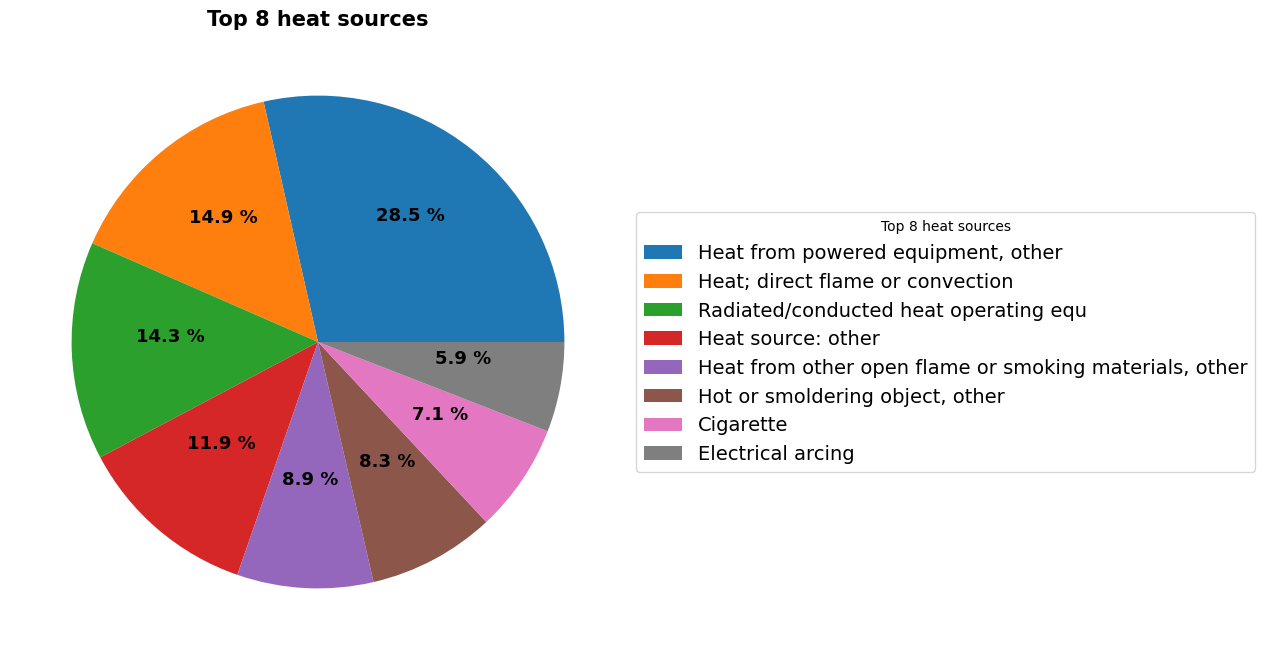

In [71]:
##
#
# Author: 
# Salim Omar
#
##

# Drop rows with missing data and unwanted values
df.dropna(subset=['Heat Source'], inplace=True)
df = df[~df['Heat Source'].isin(['UU Undetermined', 'UU - Undetermined', '-'])]

# Get the top 8 Heat Sources
top_heat_sources1 =df['Heat Source'].str[3:]
top_heat_sources1 = top_heat_sources1.str.replace('- ', '')
top_heat_sources = top_heat_sources1.value_counts().nlargest(8)
print(top_heat_sources)

# Create a figure and axis with equal aspect ratio
fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(aspect="equal"))



# Define a function to format the autopct labels with percentage and absolute count
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f} %\n "

# Create the pie chart
wedges, texts, autotexts = ax.pie(top_heat_sources.values, autopct=lambda pct: func(pct, top_heat_sources.values),
                                textprops=dict(color="w"))
# Add legend with the top 8 heat sources and adjust font size
ax.legend(wedges, top_heat_sources.index,
        title="Top 8 heat sources",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        prop={'size': 14}
        )


# Adjust font size and color for the autopct labels
plt.setp(autotexts, size=13, weight="bold", color="black")
# Add title to the plot
ax.set_title("Top 8 heat sources",weight="bold",size=15)

# convert to HTML and save
html = mpld3.fig_to_html(fig)
with open('heat_sources_plot.html', 'w') as f:
    f.write(html)
    

plt.show()

_________________________________________________________________________________________________________________________________

# Part 2

## 1. Bar chart

This code is changing some columns to a alarm date and arrival time format and figuring out the time difference between two of those columns. 

In [10]:

# Author-
# Ali Dadayev 



# It calculates the time difference between the "Arrival DtTm" column and the "Alarm DtTm" column and saves it in a new column called "Arrive time_minutes".
df['Arrive time_minutes'] = (df['Arrival DtTm'] - df['Alarm DtTm'])

# df.head()

This code calculates the average (mean) arrival time for a dataset. It uses the mean() method to calculate the average of the "Arrive time_minutes" column of the DataFrame df, which was created in the previous code block by subtracting the "Alarm DtTm" column from the "Arrival DtTm" column.

In [11]:

# Author-
# Ali Dadayev 


# This line calculates the average (mean) value of the "Arrive time_minutes" column of the pandas DataFrame df, and stores the result in the variable average_arrival_time.
average_arrival_time = df['Arrive time_minutes'].mean()

# This line prints out a message to the console that includes the average arrival time.
# print("The average arrival time is:", average_arrival_time)



The code down below calculates the average arrival time of fire department units to emergency incidents, grouped by battalion.

In [12]:

# Author-
# Ali Dadayev 


#This code creates a new column in df called "Arrive time_minutes" that contains the difference between the "Arrival DtTm" and "Alarm DtTm" columns of df.
df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)


# Convert to minutes and add a new column

#df = df[df['Battalion'] != 'B99']
avg_arrival_time_by_neighborhood = df.groupby('neighborhood_district')['Arrive time_minutes'].mean().round(2)

#print(avg_arrival_time_by_battalion)


This code generates a bar chart using the Plotly library to visualize the average arrival time of different fire departments or "battalions" to a fire scene.

In [15]:

# Author-
# Ali Dadayev 
# Filter for the year 2022

# we taje the date that match the map from Salim Part 
df = df[(df['Incident Date'] >= '2022-12-01') &
            (df['Incident Date'] <= '2022-12-31')]

# we just incloud the primry situation that are showing on the map 
df = df[df['focuse_Situation_by_number'].isin(['111', '700', '113','150'])]

# Convert to minutes and add a new column
df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)

#df = df[df['Battalion'] != 'B99']
avg_arrival_time_by_battalion = df.groupby('neighborhood_district')['Arrive time_minutes'].mean().round(2).reset_index()
avg_arrival_time_by_battalion = avg_arrival_time_by_battalion.sort_values('Arrive time_minutes')
mean_arrival_time = avg_arrival_time_by_battalion['Arrive time_minutes'].mean()
# Create a bar chart with color gradient
data = [go.Bar(
            x=avg_arrival_time_by_battalion['neighborhood_district'],
            y=avg_arrival_time_by_battalion['Arrive time_minutes'],
            marker=dict(color=avg_arrival_time_by_battalion['Arrive time_minutes'],
                        colorscale='Reds',
                        cmin=1,   # set the minimum color value
                        cmax=9,   # set the maximum color value
                        reversescale=False
                        ),
            text=avg_arrival_time_by_battalion['Arrive time_minutes'],
            textposition='auto'
        )]



# Set layout options
layout = go.Layout(
    title='Average Arrival Time by neighborhood (01/2022 --> 12/2022)',
    xaxis=dict(title='neighborhood'),
    yaxis=dict(title='Average Arrival Time (Minutes)', range=[1, 7]),
    hovermode='closest',
    width=900,
    height=700,
    
    shapes=[dict(type='line', x0=-0.5, y0=mean_arrival_time, x1=len(avg_arrival_time_by_battalion)-0.5, y1=mean_arrival_time,
                 line=dict(color='red', width=2, dash='dash'))]
)

# Create the figure and save to an HTML file
fig = go.Figure(data=data, layout=layout )
pyo.plot(fig, filename='plot_for_neighborhood.html')



# Display the plot in the notebook
pyo.iplot(fig)

## 2. Line chart 

This code computes the time it takes for each fire department unit to arrive at the scene of an incident, and creates a new column in the dataset to store these values. It generates a line chart using the Plotly, seaborn and mplcursors libraryies to visualize the the dataset by battalion and year, and calculates the average arrival time for each group and sets some hovering effects on the plot.

In [81]:

# Author-
# Ali Dadayev 


# Convert to minutes and add a new column
df['Arrive time_minutes'] = ((df['Arrival DtTm'] - df['Alarm DtTm']).dt.total_seconds() / 60.0).round(2)

# Group by battalion and year
df_grouped = df.groupby(['Battalion', 'Incident year'])['Arrive time_minutes'].mean().reset_index()

# Create a line plot for each battalion using Plotly
fig = go.Figure()
for battalion in df_grouped['Battalion'].unique():
    data = df_grouped[df_grouped['Battalion'] == battalion]
    fig.add_trace(go.Scatter(x=data['Incident year'], y=data['Arrive time_minutes'], name=battalion, line=dict(width=2)))

# Set layout for the plot
fig.update_layout(
    title="Average Arrival Time by Battalion and Year",
    xaxis_title="Year",
    yaxis_title="Average Arrival Time (Minutes)",
    font=dict(
        family="Arial",
        size=16,
        color="#7f7f7f"
    ),
    legend=dict(
        title="Battalion",
        font=dict(
            family="Arial",
            size=12,
            color="#7f7f7f"
        ),
        yanchor="top",
        y=1,
        xanchor="right",
        x=1
    ),
    plot_bgcolor="#f2f2f2",
    xaxis=dict(
        tickmode='linear',
        tick0=2003,
        dtick=1
    )
)

# Add interactivity to the plot using mplcursors
annotations = [f"{battalion}\nYear: {int(data['Incident year'])}\nAvg. Arrival Time: {data['Arrive time_minutes']:.2f} minutes"
               for battalion, data in df_grouped[['Battalion', 'Incident year', 'Arrive time_minutes']].iterrows()]
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(annotations[sel.target.index]))

# Save the plot to an HTML file and display it in the browser
pyo.plot(fig, filename='battalion_arrival_time.html', auto_open=True)

# Display the plot in the notebook
pyo.iplot(fig)

## 3. Polar bar chart.

This code is creating a polar plot that shows the hourly counts of alarms in the year 2022. 

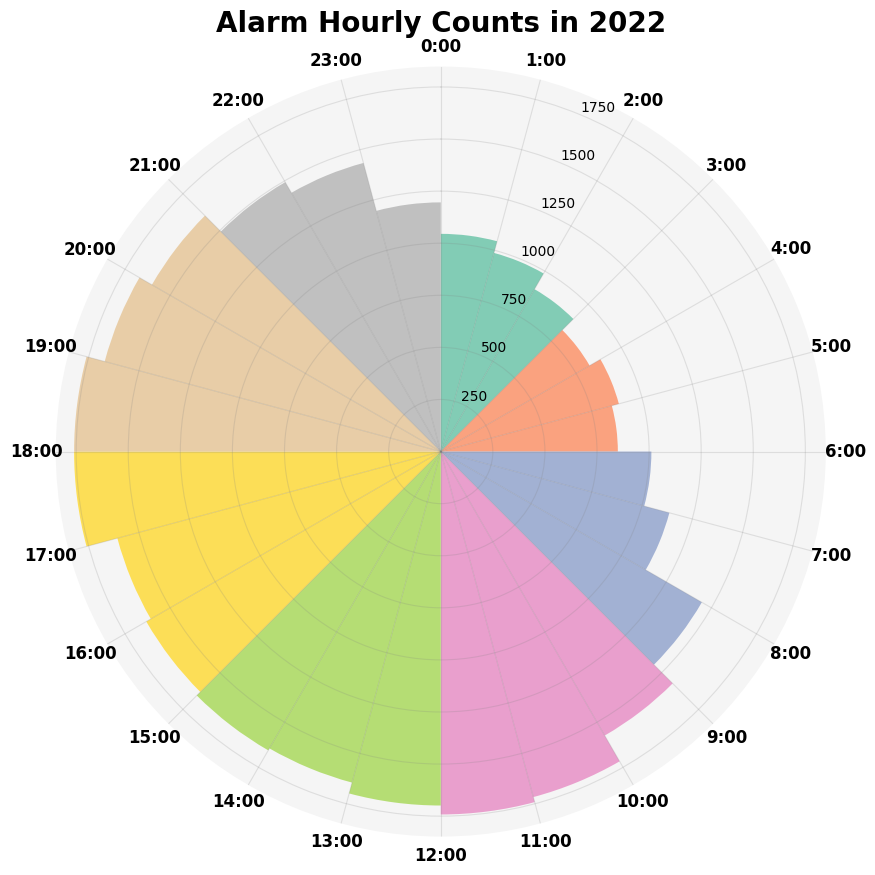

In [82]:

# Author-
# Ali Dadayev 


# Convert the alarm datetime column to datetime
df['Alarm DtTm'] = pd.to_datetime(df['Alarm DtTm'])

# Filter for the year 2022
df2 = df[df['Alarm DtTm'].dt.year == 2022]

# Group by hour and count number of alarms
hour_counts = df2.groupby(df2['Alarm DtTm'].dt.hour).size().reset_index(name='counts')

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))

colors = plt.cm.Set2(np.linspace(0, 1, len(hour_counts)))

bars = ax.bar(hour_counts['Alarm DtTm'] * 2 * np.pi / 24, hour_counts['counts'], 
              width=2*np.pi/24, align='edge', color=colors, alpha=0.8)

hours = np.arange(0, 24)
tick_labels = ['{}:00'.format(h) for h in range(24)]
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(tick_labels, fontsize=12, color='black', fontweight='bold')
ax.set_title('Alarm Hourly Counts in 2022', fontsize=20, pad=25, fontweight='bold')


# Set the starting angle and direction
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Customize the grid and background
ax.grid(color='gray', alpha=0.2)
ax.set_facecolor('whitesmoke')

# Remove unnecessary borders
ax.spines['polar'].set_visible(False)
ax.spines['start'].set_visible(False)
ax.spines['end'].set_visible(False)
ax.spines['inner'].set_visible(False)


plt.show()




_____________________________________

## Part 3


1. Load a dataset of city-owned facilities that includes information about fire stations in San Francisco.
2. Filter the dataset to only include fire stations that fall under the jurisdiction of the "Fire Department".
3. Create a new Folium map centered on San Francisco, with a zoom level of 13.
4. Loop through each row in the filtered dataset, and for each row, create a new Folium marker with the station's latitude and longitude as its location, and the station's common name as its popup text.
5. Add each marker to the Folium map.
6. Save the completed map as an HTML file named "map.html".

In summary, this code reads in data about fire stations in San Francisco, filters it to only include those managed by the "Fire Department", creates a map centered on San Francisco, adds markers to indicate the location of each fire station meeting the filter criteria, and finally saves the map to an HTML file.

In [23]:
    # Author Thomas Arildtoft - S193564

# Load the data
fire_stations = pd.read_csv('City-owned_Facilities_-_Fire_and_Police.csv')

# Filter the data to only include fire stations with "Fire Department" in the jurisdiction
san_francisco_fire_stations = fire_stations[fire_stations['jurisdiction'] == 'Fire Department']

# Create a folium map centered on San Francisco
m = folium.Map(location=[37.773972, -122.431297], zoom_start=13)

# Add markers for each fire station
for index, row in san_francisco_fire_stations.iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['common_name']).add_to(m)

# Save the map to an HTML file
m.save('Fire_stations_map.html')
m


1. Filter the data from a DataFrame "df" by Battalion and Incident Date, selecting only the rows with a Battalion value within a certain list and within a certain date range.
2. Create a new column "Year" in the filtered DataFrame with the year of the incident.
3. Group the filtered DataFrame by Battalion and Year and count the number of incidents per group, resetting the index to create a new DataFrame.
4. Pivot the grouped DataFrame to create a table with Battalion as rows and Year as columns.
5. Create a stacked bar chart with the pivoted DataFrame, with the year on the x-axis and the number of incidents on the y-axis, and with each Battalion's contribution to the total number of alarms stacked on top of each other.
6. Add a title and labels to the chart.
7. Move the legend outside the plot area.
8. Add hover effects to the plot using mplcursors. When hovering over a stacked bar in the plot, display a label with the Battalion name, Year, and Count of alarms for that Battalion in that year.
9.
10. Show the completed plot.

In summary, this code filters and pivots data from a DataFrame to create a stacked bar chart showing the total number of alarms for all battalions per year, and adds hover effects to show more information about each bar.

C:\Users\salim\AppData\Local\Temp\ipykernel_9508\3669083410.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



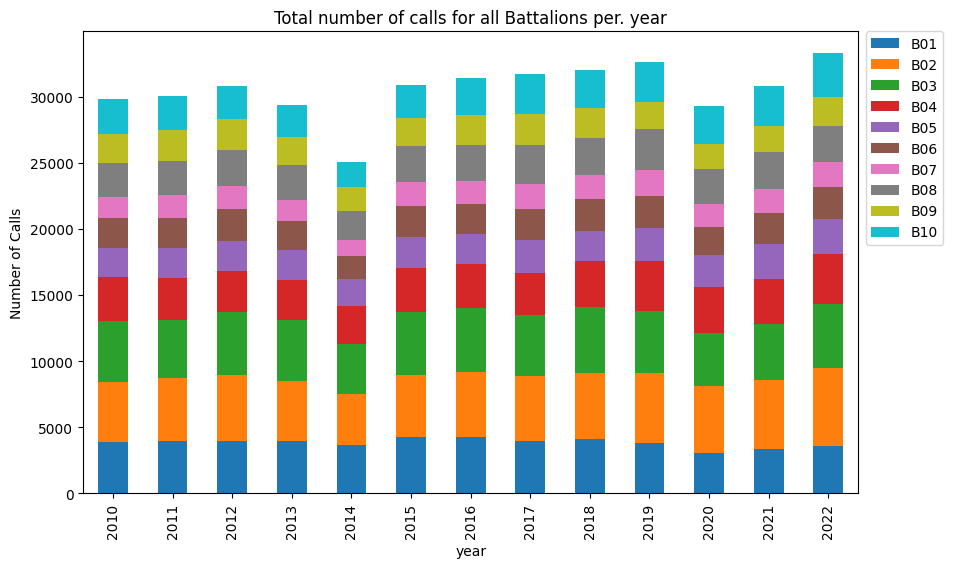

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
import mpld3

# Filter the data by Battalion and Incident Date
df_filtered = df[(df['Battalion'].isin(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10'])) &
                 (df['Incident Date'] >= '2010-01-01') &
                 (df['Incident Date'] <= '2022-12-31')]

# Create a new column with the year of the incident
df_filtered['Year'] = pd.DatetimeIndex(df_filtered['Incident Date']).year

# Group the data by Battalion and Year and count the number of incidents
df_grouped = df_filtered.groupby(['Battalion', 'Year'])['Incident Number'].count().reset_index()

# Pivot the data to create a table with Battalion as rows and Year as columns
df_pivoted = df_grouped.pivot(index='Year', columns='Battalion', values='Incident Number')

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

df_pivoted.plot(kind='bar', stacked=True, ax=ax)

# Set the title and axis labels
ax.set_title('Total number of calls for all Battalions per. year')
ax.set_xlabel( 'year')
ax.set_ylabel('Number of Calls')

# Move the legend outside the plot area
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

# Add hover effects to the plot
cursor = mplcursors.cursor(ax, hover=True)
@cursor.connect('add')
def on_add(sel):
    battalion = sel.artist.get_label()
    year = sel.target[0]
    count = df_pivoted.loc[year, battalion]
    sel.annotation.set_text(f'Battalion: {battalion}\nYear: {year}\nCount: {count}')
    sel.annotation.set_position((-20, 20))
    sel.annotation.set_fontsize(12)
    sel.annotation.set_fontstyle('italic')
    sel.annotation.set_backgroundcolor('white')
    sel.annotation.set_bbox({'boxstyle': 'round', 'edgecolor': 'gray', 'alpha': 0.7})

# Convert the plot to HTML
html_fig = mpld3.fig_to_html(fig)

# Output the HTML
with open('Total_Number_Of_alarms_Battalion.html', 'w') as f:
    f.write(html_fig)



This code generates a calendar plot showing the number of fire incidents that occurred on each day within a given date range. It also adds a hover effect to display the exact count for each date.

Here's what the code does step by step:

1. Import necessary libraries: matplotlib.pyplot, calplot, and mplcursors.
2. Group the fire incidents by date and count the number of incidents on each date.
3. Filter out dates with zero incidents.
4. Create a Pandas Series using the date range from "2010-04-01" to "2023-04-01" with a frequency of one day.
5. Create a calendar plot using calplot, using the counts from step 2 as input data and setting the colormap to 'cool'.
6. Add a hover effect to the plot using mplcursors. The function on_add() is called when a cursor is added to the plot. It extracts the index and value of the selected date and sets the text of the annotation to display the date and its count.

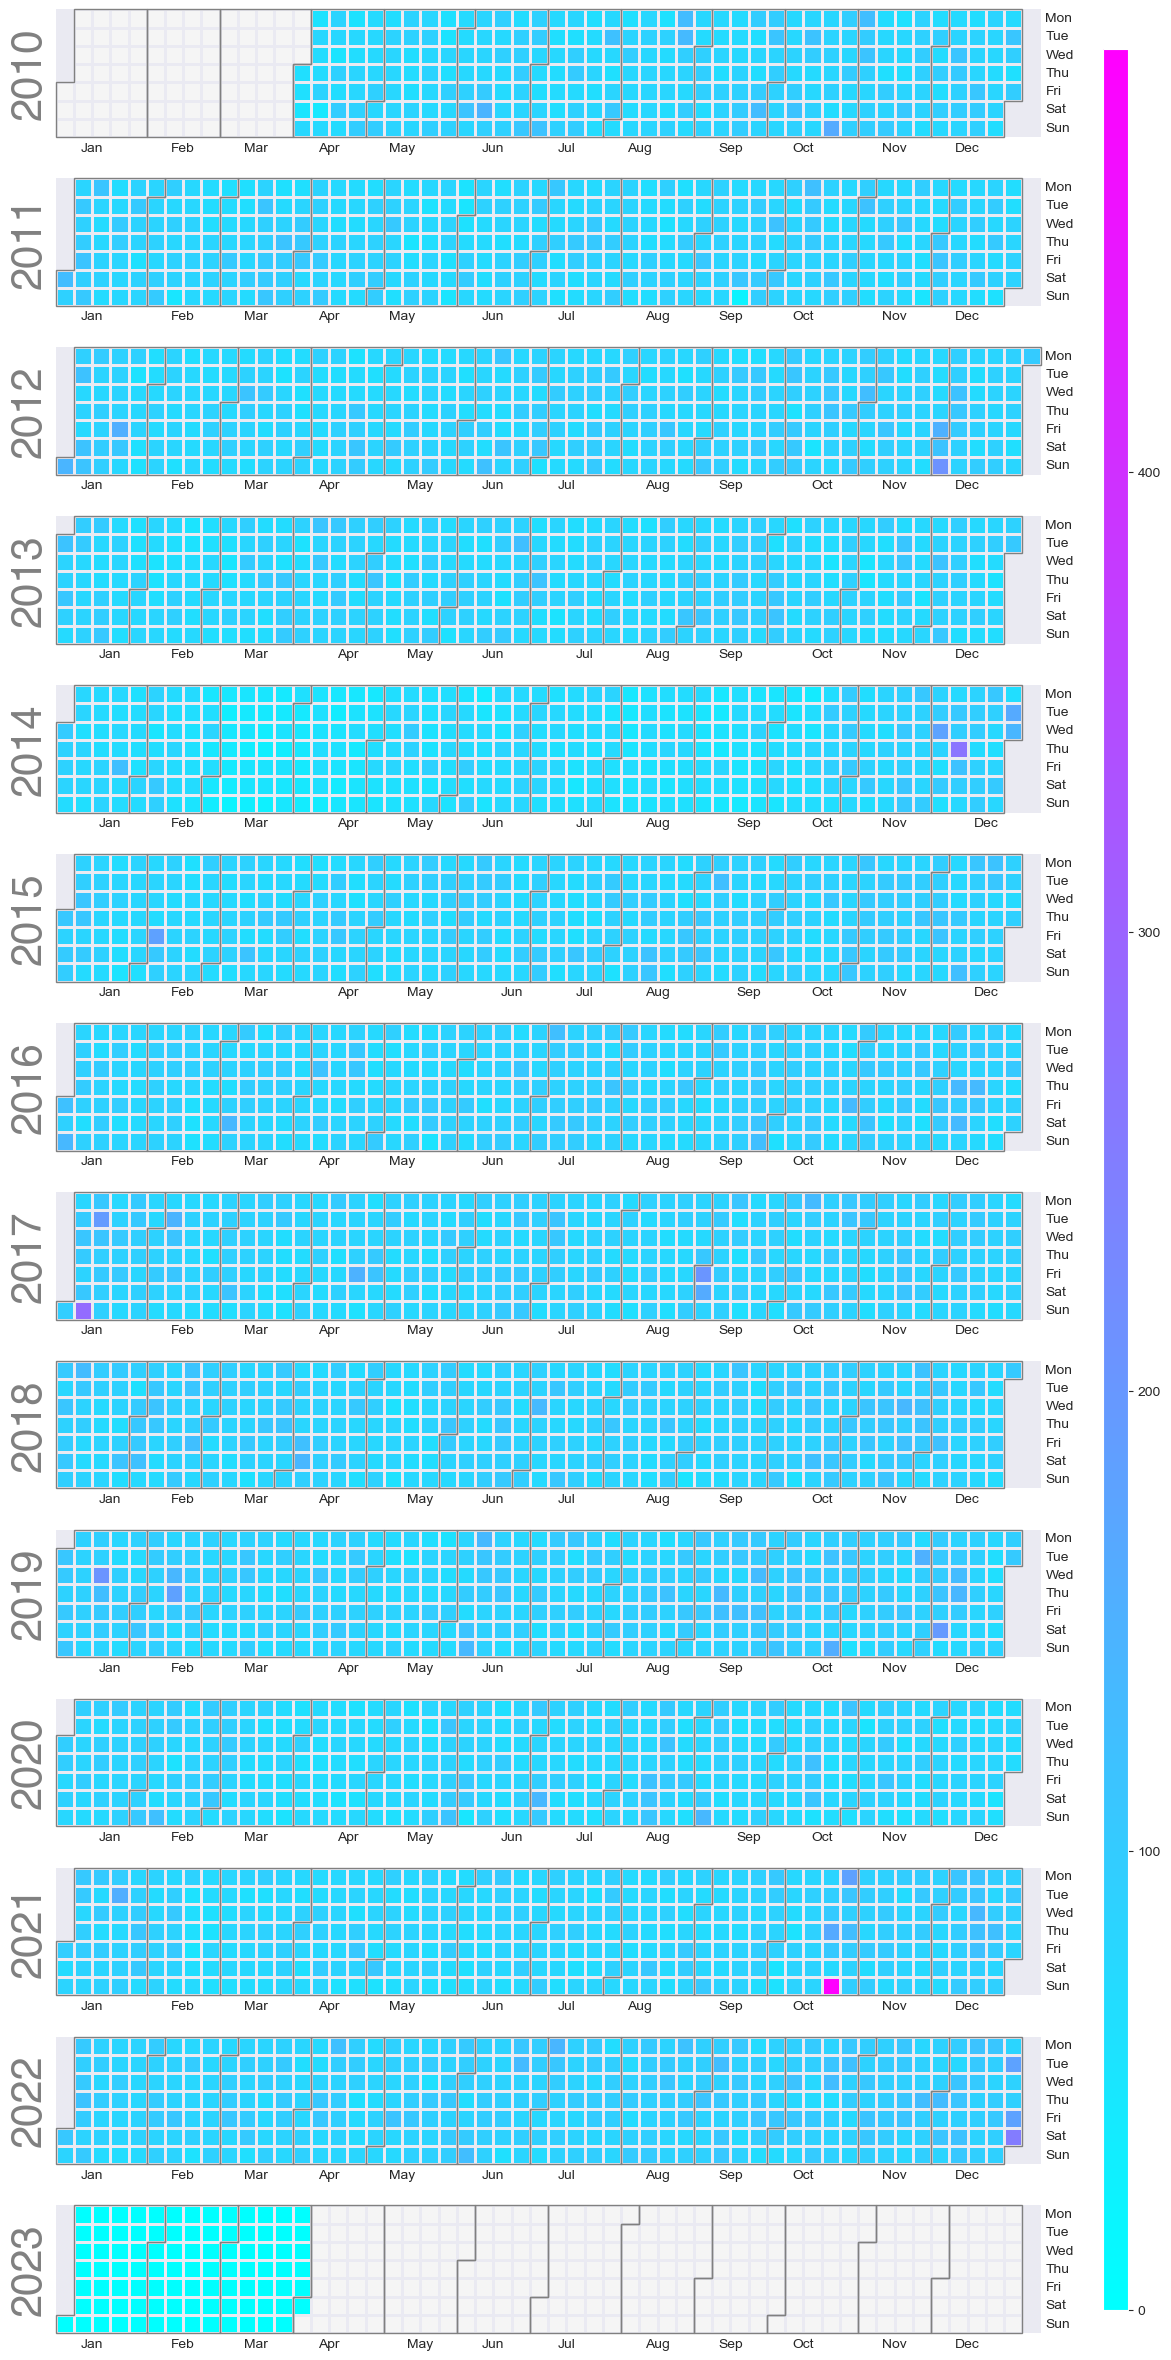

In [25]:
# Author Thomas Arildtoft - S193564

# Filter the fire incidents to keep only dates where incidents happened
events_by_date = df.groupby('Incident Date').size()

non_zero_dates = events_by_date[events_by_date > 0].index

df_filtered = df[(df['Incident Date'].isin(non_zero_dates))]

# Group the filtered DataFrame by date and count the number of incidents on each date
counts = df_filtered.groupby('Incident Date').size()

theRange = pd.date_range(start="2010-04-01", end="2023-04-01", freq='D')
events = pd.Series(counts, index=theRange)

# Set the colormap to 'cool'
custom_cmap = plt.get_cmap('cool')
fig, ax = calplot.calplot(events, cmap=custom_cmap)

# Add a hover effect to show the value of each date
cursor = mplcursors.cursor(ax, hover=True)
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    value = events.loc[index]
    sel.annotation.set_text(f"{index.strftime('%Y-%m-%d')}: {value}")

# Convert the plot to an interactive HTML format
html_fig = mpld3.fig_to_html(fig)

# Save the HTML file
with open('calplot.html', 'w') as f:
    f.write(html_fig)

1. Import necessary libraries: The code imports datetime module for working with dates and times, and matplotlib.pyplot for plotting graphs.

2. Get top 10 most frequent unique values in 'Primary Situation' column: The code finds the top 10 most frequently occurring unique values in the 'Primary Situation' column of the DataFrame df using the value_counts() and nlargest() methods.

3. Replace missing values in 'Arrival DtTm' column with 'Missing': The code replaces missing (NaN) values in the 'Arrival DtTm' column of the DataFrame df with the string 'Missing' using the fillna() method.

4. Calculate average response time for each situation: The code calculates the average response time for each situation in the top_situations list. It loops through each situation, selects rows with that situation, and calculates the response time for each row (if it is not missing). The response times are stored in a list, and if the list is not empty, the average response time is calculated and stored in a dictionary with the situation as key.

5. Plot bar chart of average response times for top 10 situations: The code plots a bar chart of the average response times for the top 10 situations using the bar() and xticks() methods of matplotlib.pyplot. The x-axis labels are rotated vertically for better readability.

6. Show the plot: The code displays the plot using the show() method of matplotlib.pyplot.

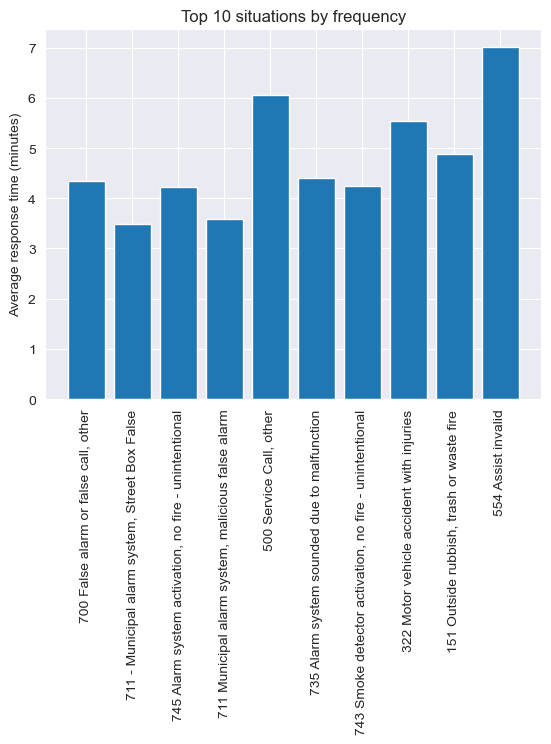

In [29]:
# Author Thomas Arildtoft - S193564

# Get top 10 most frequent unique values in 'Primary Situation' column
top_situations = df['Primary Situation'].value_counts().nlargest(10).index.tolist()

# Replace missing values in 'Arrival DtTm' column with 'Missing'
df['Arrival DtTm'].fillna('Missing', inplace=True)

# Calculate average response time for each situation
avg_response_times = {}
for situation in top_situations:
    situation_rows = df[df['Primary Situation'] == situation]
    response_times = []
    for index, row in situation_rows.iterrows():
        alarm_time = datetime.strptime(row['Alarm DtTm'].strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S')
        if row['Arrival DtTm'] != 'Missing': # check for missing values
            arrival_time = datetime.strptime(str(row['Arrival DtTm']), '%Y-%m-%d %H:%M:%S')
            response_time = (arrival_time - alarm_time).total_seconds() / 60.0
            response_times.append(response_time)
    if response_times: # check if list is not empty
        avg_response_time = sum(response_times) / len(response_times)
        avg_response_times[situation] = avg_response_time

# Plot bar chart of average response times for top 10 situations
fig, ax = plt.subplots()
ax.bar(range(len(avg_response_times)), list(avg_response_times.values()), align='center')
ax.set_xticks(range(len(avg_response_times)))
ax.set_xticklabels(list(avg_response_times.keys()), rotation='vertical')
ax.set_ylabel('Average response time (minutes)')
ax.set_title('Top 10 situations by frequency')

# Create HTML file with interactive chart using mpld3
html = mpld3.fig_to_html(fig)
with open('response_times.html', 'w') as f:
    f.write(html)


This code reads in a dataframe df and calculates the average response time for the top 10 most frequent unique values in the 'Primary Situation' column, broken down by year. It then creates a line chart showing the trend of average response time for each situation from 2010 to 2023.

To achieve this, the code first gets the top 10 most frequent unique values in the 'Primary Situation' column and replaces the missing values in the 'Arrival DtTm' column with the string 'Missing'. It then creates a dictionary situation_data to store the average response time data for each situation.

The code then loops through each year from 2010 to 2023, selects rows from the dataframe that begin with the current year, and calculates the average response time for each situation in that year. It appends the average response time to the corresponding list in situation_data.

Finally, the code creates a line chart using matplotlib to show the trend of average response time for each situation from 2010 to 2023. It adds a legend, x-axis label and tick labels, y-axis label, and an information box. It also adds hover effects using mplcursors to display the details for each point on the chart. The resulting chart allows the viewer to compare the trends in average response time for different situations over time.

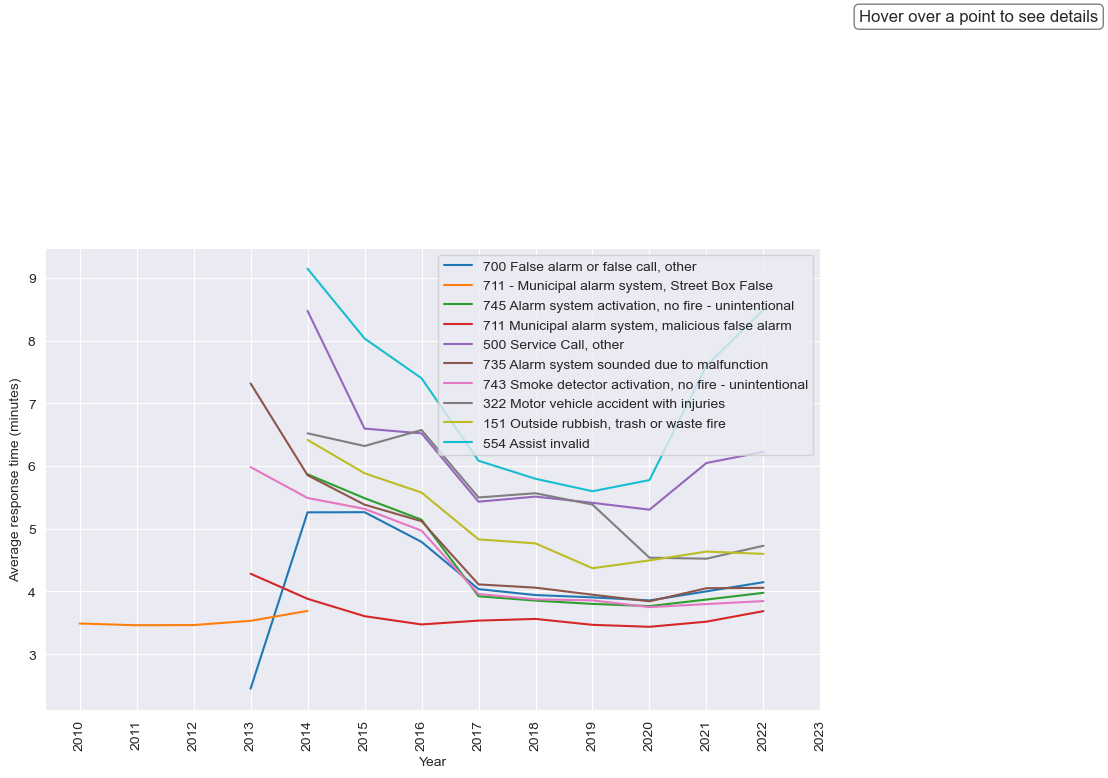

In [41]:
# Author Thomas Arildtoft - S193564

# Convert 'Alarm DtTm' column to string
df['Alarm DtTm'] = df['Alarm DtTm'].astype(str)

# Get top 10 most frequent unique values in 'Primary Situation' column
top_situations = df['Primary Situation'].value_counts().nlargest(10).index.tolist()

# Replace missing values in 'Arrival DtTm' column with 'Missing'
df['Arrival DtTm'].fillna('Missing', inplace=True)

# Create dictionary to store data for each situation
situation_data = {situation: [] for situation in top_situations}

# Loop through each year from 2010 to 2023
for year in range(2010, 2024):
    year_rows = df[df['Alarm DtTm'].str.startswith(str(year))]
    for situation in top_situations:
        situation_rows = year_rows[year_rows['Primary Situation'] == situation]
        response_times = []
        for index, row in situation_rows.iterrows():
            if row['Arrival DtTm'] != 'Missing': # check for missing values
                alarm_time = datetime.strptime(row['Alarm DtTm'], '%Y-%m-%d %H:%M:%S')
                arrival_time = pd.Timestamp.strftime(row['Arrival DtTm'], '%Y-%m-%d %H:%M:%S')
                arrival_time = datetime.strptime(arrival_time, '%Y-%m-%d %H:%M:%S') # convert to datetime object
                response_time = (arrival_time - alarm_time).total_seconds() / 60.0
                response_times.append(response_time)
        if response_times: # check if list is not empty
            avg_response_time = sum(response_times) / len(response_times)
            situation_data[situation].append(avg_response_time)
        else:
            situation_data[situation].append(None)

# Plot line chart of average response times for top 10 situations by year
fig, ax = plt.subplots(figsize=(10, 6))

for situation, data in situation_data.items():
    ax.plot(range(2010, 2024), data, label=situation)

# Add legend
ax.legend()

# Add x-axis label and tick labels
ax.set_xlabel('Year')
ax.set_xticks(range(2010, 2024))
ax.set_xticklabels(range(2010, 2024), rotation=90)

# Add y-axis label
ax.set_ylabel('Average response time (minutes)')

# Add hover effects using mplcursors
mplcursors.cursor(ax).connect('add', lambda sel: sel.annotation.set_text(f'{sel.artist.get_label()}: {sel.target[1]:.2f} minutes'))

# Add information box outside the chart
info_text = 'Hover over a point to see details'
plt.text(1.05, 0.5, info_text, transform=ax.transAxes,
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray'),
         fontsize=12, ha='left', va='center')

# Show plot
plt.show()


This code creates a new Pandas DataFrame called neighborhoods_df that contains the unique values from the "neighborhood_district" column of an existing DataFrame called df. The pd.DataFrame() function is used to create the new DataFrame, passing in the array of unique values from the "neighborhood_district" column as the first argument, and specifying the name of the new column as "neighborhood_district" using the columns parameter.

Finally, the print() function is used to display the new DataFrame to the console. This will output the unique values from the "neighborhood_district" column of the original DataFrame df, with each unique value appearing in its own row under the "neighborhood_district" column header.

In [14]:
# Author Thomas Arildtoft - S193564

# Create a new DataFrame with unique values in the "neighborhood_district" column
neighborhoods_df = pd.DataFrame(df["neighborhood_district"].unique(), columns=["neighborhood_district"])

# Print the new DataFrame
print(neighborhoods_df)


             neighborhood_district
0   Financial District/South Beach
1                        Lakeshore
2                   Outer Richmond
3                        Excelsior
4            Bayview Hunters Point
5                          Mission
6                 Western Addition
7                      Mission Bay
8                       Tenderloin
9                          Portola
10                    Inner Sunset
11                  Bernal Heights
12                 South of Market
13                 Pacific Heights
14                    Hayes Valley
15                    Potrero Hill
16                 Sunset/Parkside
17                       Chinatown
18      Oceanview/Merced/Ingleside
19             Castro/Upper Market
20               Lone Mountain/USF
21                Presidio Heights
22               Visitacion Valley
23              West of Twin Peaks
24                     North Beach
25                    Russian Hill
26                  Haight Ashbury
27                  

1. The code imports pandas, matplotlib, and seaborn libraries.
2. The code defines a filter_condition by selecting incidents that happened in the year 2022 and have a Primary Situation of "500 Service Call, other" or "700 False alarm or false call, other".
3. The code filters the original DataFrame, df, based on the filter_condition to create a new DataFrame, filtered_df.
4. The code calculates the response time for each incident by subtracting the "Alarm DtTm" from the "Arrival DtTm" columns in filtered_df. The result is stored in the response_time variable.
5. The code calculates the average response time by taking the mean of the response_time variable.
6. The code creates a new filter_condition that selects incidents with a response time above the average response time.
7. The code filters the filtered_df DataFrame based on above_avg_condition to create a new DataFrame, above_avg_df.
8. The code calculates the percentage of incidents with above average response time by neighborhood by using the value_counts() and normalize() methods of the above_avg_df["neighborhood_district"] column. The result is stored in the percentage_by_neighborhood variable.
9. The code creates a bar chart of the percentage of incidents with above average response time by neighborhood using seaborn's barplot() function. The x-axis represents neighborhoods, and the y-axis represents the percentage of incidents. The plot also includes a red dashed line representing the average percentage of incidents across all neighborhoods, which is computed by taking the mean of the percentage_by_neighborhood variable.
10. Finally, the plot is customized by adding a title, x-axis label, y-axis label, rotating the x-axis tick labels, setting the y-axis limits, and adding a legend. The plot is displayed using the show() function.

/Users/thomas/opt/anaconda3/lib/python3.9/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.



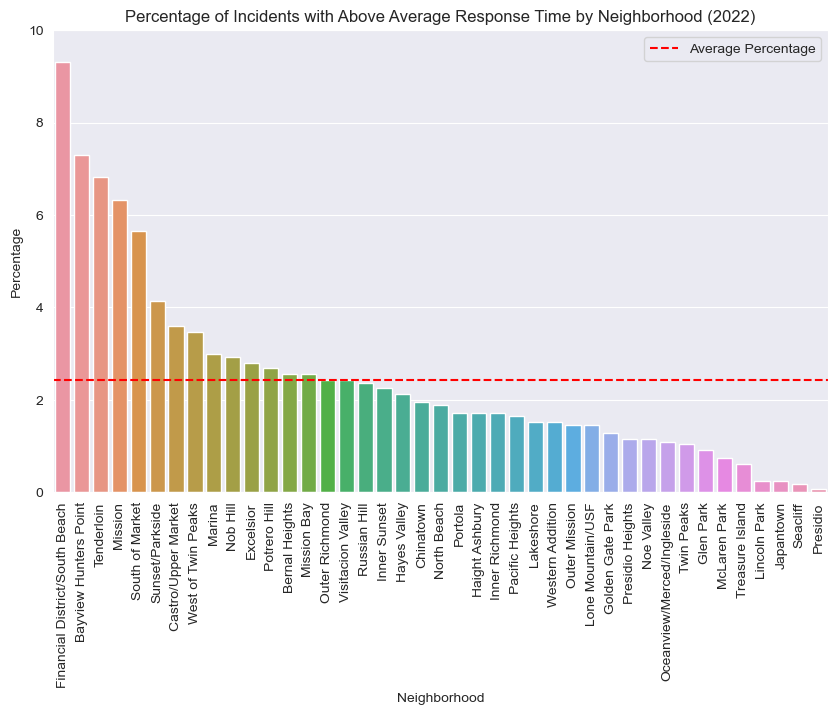

In [35]:
# Author Thomas Arildtoft - S193564

# Filter for incidents in the year 2022 and with Primary Situation of "500 Service Call, other" or "700 False alarm or false call, other"
filter_condition = (df["Alarm DtTm"].astype(str).str.startswith("2022")) & ((df["Primary Situation"] == "500 Service Call, other") | (df["Primary Situation"] == "700 False alarm or false call, other"))
filtered_df = df.loc[filter_condition]

# Calculate the response time for each incident and find the average
response_time = pd.to_datetime(filtered_df["Arrival DtTm"]) - pd.to_datetime(filtered_df["Alarm DtTm"])
average_response_time = response_time.mean()

# Filter for incidents with response time above the average and find the percentage by neighborhood
above_avg_condition = (response_time > average_response_time)
above_avg_df = filtered_df.loc[above_avg_condition]
percentage_by_neighborhood = above_avg_df["neighborhood_district"].value_counts(normalize=True) * 100

# Create a bar chart of the percentage of incidents with above average response time by neighborhood
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_by_neighborhood.index, y=percentage_by_neighborhood.values)
plt.title("Percentage of Incidents with Above Average Response Time by Neighborhood (2022)")
plt.xlabel("Neighborhood")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.axhline(y=percentage_by_neighborhood.mean(), color="red", linestyle="--", label="Average Percentage")
plt.legend()

# Save the plot as an HTML file using mpld3
html_fig = mpld3.fig_to_html(plt.gcf())
with open('Percentage_of_Incidents_Above_Average_Response_Time.html', 'w') as f:
    f.write(html_fig)



1. The first few lines of code extract the coordinates from the "point" column and create separate columns for latitude and longitude.

2. The "Incident Year" column is added to extract the year from the "Incident Date" column.

3. The DataFrame is filtered to only include incidents from 2022 with primary situations of "500 Service Call, other" or "700 False alarm or false call, other".

4. The response time is calculated by subtracting "Arrival DtTm" from "Alarm DtTm". The response time is then converted to minutes.

5. The average response time is calculated.

6. The DataFrame is filtered to only include incidents with above-average response time.

7. The average response time is calculated by neighborhood and stored in a new DataFrame.

8. The percentage of incidents with above-average response time is calculated by neighborhood and stored in a new DataFrame.

9. The three DataFrames are merged together into one DataFrame.

10. The DataFrame is sorted by the percentage of above-average response times and only the top 5 neighborhoods are selected.

11. A folium map is created and centered on San Francisco.

12. A heatmap layer is added to the map using only the data for the top 5 neighborhoods.

13. The map is displayed.

Overall, this code provides a visual representation of the response times for emergency incidents in San Francisco by neighborhood, highlighting the neighborhoods that experience longer response times.

In [36]:
# Author Thomas Arildtoft - S193564

# Extract the coordinates from the "point" column and create separate columns for latitude and longitude
df["coordinates"] = df["point"].str.replace("POINT \(", "").str.replace("\)", "")
df[["longitude", "latitude"]] = df["coordinates"].str.split(expand=True)
df = df.drop(columns=["coordinates"])

# Extract the incident year from the "Incident Date" column
df["Incident Year"] = pd.to_datetime(df["Incident Date"]).dt.year

# Filter the DataFrame to only include incidents from 2022 with primary situation of "500 Service Call, other" or "700 False alarm or false call, other"
filtered_df = df[(df["Incident Year"] == 2022) & (df["Primary Situation"].isin(["500 Service Call, other", "700 False alarm or false call, other"]))]

# Calculate the response time by subtracting "Arrival DtTm" from "Alarm DtTm"
filtered_df["Response DtTm"] = pd.to_datetime(filtered_df["Arrival DtTm"]) - pd.to_datetime(filtered_df["Alarm DtTm"])
response_time = filtered_df["Response DtTm"].dt.total_seconds() / 60

# Calculate the average response time
average_response_time = response_time.mean()

# Filter the DataFrame to only include incidents with above average response time
above_avg_condition = (response_time > average_response_time)
above_avg_df = filtered_df.loc[above_avg_condition]
response_time_by_neighborhood = above_avg_df.groupby("neighborhood_district")["Response DtTm"].mean().dt.total_seconds() / 60

# Create a new DataFrame with the average response time by neighborhood
neighborhoods_df = pd.DataFrame(response_time_by_neighborhood).reset_index()

# Calculate the percentage of incidents with above average response time by neighborhood
neighborhood_pct = (above_avg_df.groupby("neighborhood_district")["Incident Number"].count() / filtered_df.groupby("neighborhood_district")["Incident Number"].count() * 100).reset_index()
neighborhood_pct = neighborhood_pct.rename(columns={"Incident Number": "Pct Above Avg"})

# Merge the average response time by neighborhood DataFrame with the neighborhoods DataFrame and the neighborhood percentage DataFrame
merged_df = pd.merge(neighborhoods_df, df[["neighborhood_district", "latitude", "longitude"]].drop_duplicates(), on="neighborhood_district")
merged_df = pd.merge(merged_df, neighborhood_pct, on="neighborhood_district")

# Sort by percentage of above-average response times and select only the top 5 neighborhoods
merged_df = merged_df.sort_values(by="Pct Above Avg", ascending=False).head(5)

# Create a folium map centered on San Francisco
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Add a heatmap layer to the map using only the data for the top 5 neighborhoods
HeatMap(data=merged_df[["latitude", "longitude", "Response DtTm"]].values.tolist(), radius=10, blur=5).add_to(m)

# Display the map
m.save('Response_time_map.html')
m

/var/folders/jp/76_36xgd3h55bg0npgjn08100000gn/T/ipykernel_7287/1285134753.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/jp/76_36xgd3h55bg0npgjn08100000gn/T/ipykernel_7287/1285134753.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



End